In [314]:
# 1.Import and preprocess the dataset.

In [342]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [343]:
df = pd.read_csv('Titanic-Dataset.csv')

In [344]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [345]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [346]:
# Handle Missing Value
si = SimpleImputer(strategy ="median")
ar = si.fit_transform(df[["Age"]])
df["Age"] = ar
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


In [347]:
df["Embarked"][60:65]

60      C
61    NaN
62      S
63      S
64      C
Name: Embarked, dtype: object

In [348]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [349]:
df["Embarked"][60:65]

60    C
61    S
62    S
63    S
64    C
Name: Embarked, dtype: object

In [350]:
df = df.drop('Cabin', axis=1)

In [351]:
df = df.dropna()

In [352]:
# Encoding Categorical Columns
df["Sex"] = df["Sex"].map({'male':1, 'female':0})

In [353]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
en_data = df[["Embarked"]]

ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = ohe.fit_transform(en_data)

encoded_cols = ohe.get_feature_names_out(["Embarked"])

encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

df = pd.concat([df.drop("Embarked", axis=1), encoded_df], axis=1)


In [354]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0.0,0.0


In [355]:
# Select features (independent variables) and target (dependent variable)
# We'll try to predict 'Fare' based on other numerical features
X = df[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch','Embarked_Q', 'Embarked_S']]  # Features
y = df['Fare']  # Target

# Standardize features (optional for linear regression, but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [356]:
# 2.Split data into train-test sets.

In [357]:
from sklearn.model_selection import train_test_split

In [358]:
# Split the data: 80% training, 20% testing

# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (712, 7)
Test set size: (179, 7)


In [359]:
# 3.Fit a Linear Regression model using sklearn.linear_model.

In [360]:
from sklearn.linear_model import LinearRegression

# Now create the model
model=LinearRegression()

# Train the model using training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [361]:
# “If I have a new passenger’s details (like Age, Sex, etc.), how can I predict their Fare using my trained model?”

In [362]:
# # Step 1: Define column names
feature_columns = ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch','Embarked_Q', 'Embarked_S']

# Step 2: Create a DataFrame for the new passenger
new_passenger_df = pd.DataFrame([[1, 25, 1, 4, 2,0,1]], columns=feature_columns)

In [363]:
# Step 3: Scale using the fitted scaler
new_passenger_scaled = scaler.transform(new_passenger_df)

In [364]:
# Step 4: Predict fare
predicted_fare = model.predict(new_passenger_scaled)
print("Predicted Fare: $", round(predicted_fare[0], 2))

Predicted Fare: $ 1.0


In [365]:
# 4.Evaluate model using MAE, MSE, R².

In [366]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_test: actual fares
# y_pred: predicted fares (from model.predict)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R²) Score:", round(r2, 4))


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R-squared (R²) Score: 1.0


In [367]:
# 5.Plot regression line and interpret coefficients.

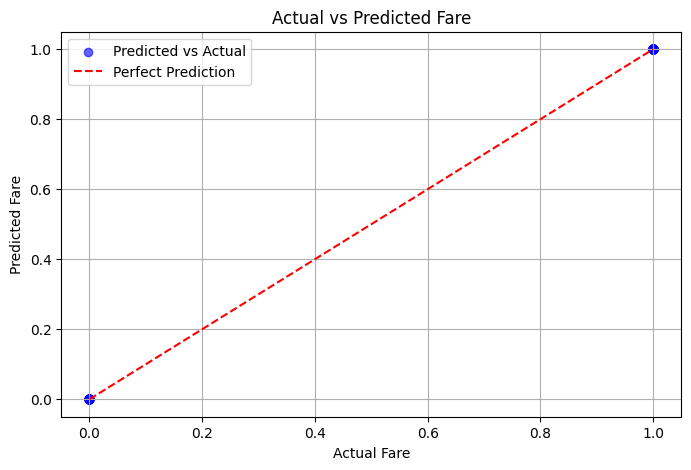

In [368]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.legend()
plt.grid(True)
plt.show()